# Test of pdf metadata saving and recovery

The function `add_pdf_metadata` from `pdf_metadata.py` can be used to insert a Python dict into a specified pdf file while `get_pdf_metadata` retrieves a previously inserted dict from a pdf file.

These functions rely on `PyPDF2`, which can be installed with: <br>
```
conda install -c conda-forge pypdf2
```

**Note: the metadata key names cannot contain spaces.**

In [1]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from pdf_metadata import add_pdf_metadata, get_pdf_metadata

In [2]:
mpl.rc('savefig', transparent=False, bbox='tight', pad_inches=0.05, 
      dpi=300, format='pdf')

amplitude = 2
wave_number = 3


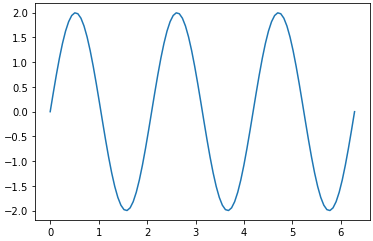

In [3]:
# Note: we might want these variables in a dict from the beginning
A = 2; k = 3
x_pts = np.linspace(0, 2*np.pi, 100)
y_pts = A * np.sin(k * x_pts)

fig, ax = plt.subplots()
ax.plot(x_pts, y_pts)

# make up metadata to store; no spaces in keys and only strings for values!
my_metadata = {"amplitude" : str(A), "wave_number" : str(k)}

fig_filename = f'pdf_metadata_test_A{A:.0f}_k{k:.0f}.pdf'
fig.savefig(fig_filename)

# Now add the metadata!
add_pdf_metadata(fig_filename, my_metadata)

# Get the metadata back and check that it worked
retrieved_metadata = get_pdf_metadata(fig_filename)
for key, value in retrieved_metadata.items():
    print(f'{key} = {value}')


In [4]:
new_metadata = {"m_pi" : str(138), "order" : "N3LO", "Lambda_b" : str(600)}
add_pdf_metadata(fig_filename, new_metadata)


In [5]:
# Get the metadata back and check that it worked
retrieved_metadata = get_pdf_metadata(fig_filename)
for key, value in retrieved_metadata.items():
    print(f'{key} = {value}')


amplitude = 2
wave_number = 3
m_pi = 138
order = N3LO
Lambda_b = 600
